In [1]:
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
from nltk.probability import FreqDist
import tqdm
import pandas as pd
import numpy as np

import re

In [3]:

# in this code block we will convert raw text source into the pandas data frame and save data frame as pickle file in data folder

from  code_base.ETL import data_set_preparation
#file will saved and updated in config file 
data_set_preparation.construct_data_frame()

100%|█████████▉| 48968/49000 [08:02<00:00, 101.49it/s]
Data set shape (48968, 6)


In [13]:
from code_base.config import config
import os   
_config  = config()

_file=open(os.path.join(_config._data_dump,_config.DATA_FRAME),"rb")
import pickle
# _config.DATA_FRAME

data_frame=pickle.load(_file)


In [14]:
data_frame.head()

,Keywords,articlle_id,bod_len,body,no_of_keywords,no_words
0,[recipes\n],38fe2a73-98a7-3212-811b-e37c10641724,9391.0,homemanage your lifefashion beautyhealthy livi...,1.0,1607.0
1,[baseball\n],ce6e7fba-75de-4324-b246-02519f10de6d,645.0,s korean breaks home run world baseball record...,1.0,112.0
2,[horse-racing\n],1b55dc6b-7c27-33bb-a480-b84c684c0257,818.0,manzi bartlett hurt in freehold raceway accide...,1.0,138.0
3,"[wall_street, stock_market\n]",eb746ef1-e9d5-4092-90b0-d55e779acb4a,2569.0,election proof stocks biotech and software tak...,2.0,478.0
4,"[executive-branch, foreign-policy\n]",af71d72e-1183-31a5-a711-25e785dc73d8,4475.0,japanese prime minister faces tests at home an...,2.0,769.0


## Few minor corrections 

. Keywords has some whitespace \\n that need to be remove 
. other common parameters like number of keywords and length of word


In [16]:
# replace white space charector

def clean_keywords(_str):
   return [re.sub("\\n","",key) for key in _str]

data_frame["Keywords"] = data_frame.Keywords.apply(lambda x: clean_keywords(x))

In [18]:
from code_base.ETL.data_set_preparation import saveDataFrame

saveDataFrame(data_frame)

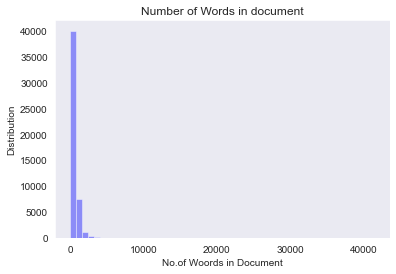

Print of distribution of number of words
Median  468.0


count    48968.000000
mean       573.732397
std        538.572339
min          3.000000
1%          39.000000
2%          61.000000
3%          77.000000
4%          89.000000
5%          98.350000
10%        131.000000
20%        224.000000
30%        318.000000
40%        391.000000
50%        468.000000
60%        554.000000
70%        659.000000
80%        803.000000
85%        906.950000
90%       1056.300000
95%       1382.000000
98%       1992.660000
max      41512.000000
Name: no_words, dtype: float64

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style("dark")
numbe_of_topics_in_doocument= sns.distributions.distplot(data_frame.no_words,kde=False,rug=False,color="blue")
plt.xlabel("No.of Woords in Document")
plt.ylabel("Distribution")
plt.title("Number of Words in document")
plt.show()
_path = os.path.join(os.path.curdir,"Visuals","Originl_document_word_discrpitio.png")
numbe_of_topics_in_doocument.get_figure().savefig(_path)


print("Print of distribution of number of words")
print(f"Median  {np.median(data_frame.no_words)}")
data_frame.no_words.describe([.01,0.02,0.03,0.04,0.05,.1,.2,.3,.4,.5,.6,.7,.80,.85,.90,.95,0.98])


In [27]:
data_frame[data_frame.no_words <=28].shape

(245, 6)

In [28]:
data_frame[data_frame.no_words >=1992].shape


(982, 6)

In [29]:
48968.000000 - 245 - 982

47741.0

In [30]:
(47741.0 / 48968.0)*100

97.49428198006862

In [76]:
# 10 random samples for keywords
import pprint

for doc in data_frame[data_frame.Keywords.apply(lambda x: "recipes" in x and "baseball" in x)].sample(n=3).body:
    print(doc)

ValueError: a must be greater than 0 unless no samples are taken

In [107]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
 
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 
 
text_data = data_frame.Keywords.to_list()
 
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
data_matrix.columns =["col_"+ col for col in data_matrix.columns]


In [129]:
# # for i in range(data_matrix.columns):
# _temp=pd.DataFrame(data_matrix.iloc[0])
# _temp.reset_index(inplace =True)
# _temp.columns =["index","value"]
# _temp=_temp[_temp.value >=1]
# _temp["column"] = 
_temp =pd.DataFrame(data_matrix.stack())
_temp.reset_index(inplace=True)
# _temp.tail()
_temp.columns =["row","col","reep_count"]
_temp.sort_values(by="reep_count",ascending=False)
_temp.to_csv("repeated_tags.csv")

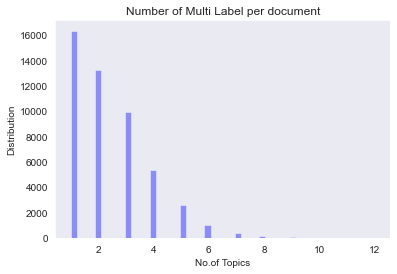

Print of diistribution of number of keywords


count    48968.000000
mean         2.394196
std          1.416564
min          1.000000
1%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          2.000000
50%          2.000000
60%          2.000000
70%          3.000000
80%          3.000000
85%          4.000000
90%          4.000000
95%          5.000000
max         12.000000
Name: no_of_keywords, dtype: float64

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style("dark")
numbe_of_topics_in_doocument= sns.distributions.distplot(data_frame.no_of_keywords,kde=False,rug=False,color="blue")
plt.xlabel("No.of Topics")
plt.ylabel("Distribution")
plt.title("Number of Multi Label per document")
plt.show()
_path = os.path.join(os.path.curdir,"Visuals","Originl_Label_distribuution.png")
numbe_of_topics_in_doocument.get_figure().savefig(_path)


print("Print of diistribution of number of keywords")
data_frame.no_of_keywords.describe([.01,.1,.2,.3,.4,.5,.6,.7,.80,.85,.90,.95])

## Review Remarks 

- After initial observation  80% of data set contain maximum of 3 labels 
- It is evident that 50% of observation having only 2 topics 

Based on the above review we will model our target document to maximum tag 3 probable type or classes 

In [36]:
# working on label distribution 
import re

_freqDist = FreqDist()

_bar = tqdm.tqdm(data_frame.shape[0])

for documents in data_frame.Keywords:
    for items in documents:
        key = re.sub("\\n","",items)
        _freqDist[key.lower()]+=1
    
    _bar.update(1)

_bar.close()


0it [00:00, ?it/s]
24777it [00:00, 245893.63it/s]
48968it [00:00, 205435.57it/s]


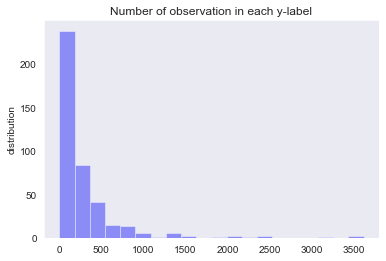

Number of observation in each y-label


,values
count,414.000000
mean,283.185990
std,449.961361
min,1.000000
1%,2.000000
10%,13.300000
20%,34.200000
30%,75.600000
40%,105.000000
50%,145.000000


In [37]:
_tag_to_observation =   np.array( [i for i in _freqDist.values()])

# np.histogram(_tag_to_observation,bins=np.arange(10),density=True)

Originl_Label_to_samples=sns.distplot(_tag_to_observation,bins=20,kde=False,rug=False,color="blue")
plt.title("Number of observation in each y-label")
plt.ylabel("distribution")
plt.show()

_path = os.path.join(os.path.curdir,"Visuals","Originl_Label_to_samples.png")
Originl_Label_to_samples.get_figure().savefig(_path)


print("Number of observation in each y-label")
_tag_to_observation = pd.DataFrame(_tag_to_observation)
_tag_to_observation.columns =["values"]
_tag_to_observation.describe([.01,.1,.2,.3,.4,.5,.6,.7,.80,.85,.90,.95])


In [304]:
len(list(filter(lambda item: _freqDist[item]<=500,_freqDist.keys())))

# list(filter(lambda item: _freqDist[item]>=500,_freqDist.keys()))

# pd.DataFrame.from_dict(_freqDist, orient='index').to_csv("Topics.csv")



In [177]:
test ="volunteering-&-philanthropy"
test = re.sub("[^a-zA-Z0-9.]", " ",test)

re.findall("\w+",test)
# test.split()

['volunteering', 'philanthropy']

In [178]:
_y_labels = []
tokens = re.sub("[^a-zA-Z0-9.]", " ","baseball")

_y_labels.append(re.findall("\w+",tokens))
_y_labels

[['baseball']]

In [275]:
_y_labels = pd.DataFrame()

for tokens in _freqDist.keys():
    try:
        tokens = re.sub("[^a-zA-Z0-9.]", " ",tokens)
        _item = re.findall("\w+",tokens)
        _y_labels=_y_labels.append({"tokens":_item},ignore_index=True)
    except (TypeError, AttributeError):
        print(f"Error {tokens}")
# _y_labels = pd.DataFrame(_y_labels)
print(_y_labels.head())


import spacy
nlp = spacy.load("en_core_web_sm")
# doc = nlp("recipes food")
# len(doc[1].vector)
def get_vectors(_ls):
    doc = nlp("-".join(_ls))
    _results = np.zeros(96)
    for word in doc:
        _results+=word.vector
    return _results

_y_labels["vectors"] = _y_labels.tokens.apply(lambda x:get_vectors(x))

print(_y_labels.head())

res = _y_labels['vectors'].apply(pd.Series)
# _y_labels.reset_index( inplace=True)
# res.reset_index(inplace=True)
_y_labels=pd.concat([_y_labels,res],axis=1)
_y_labels=_y_labels.drop("vectors",axis=1)
_y_labels.head()

tokens
0        [recipes]
1       [baseball]
2  [horse, racing]
3   [wall, street]
4  [stock, market]
            tokens                                            vectors
0        [recipes]  [2.3017024993896484, -2.852296829223633, 0.465...
1       [baseball]  [2.0974318981170654, 0.2542155385017395, 1.679...
2  [horse, racing]  [1.3520927429199219, -0.49110686779022217, -3....
3   [wall, street]  [0.6023852825164795, -4.137448310852051, -2.45...
4  [stock, market]  [0.9196388721466064, -0.9837928712368011, -4.2...


,tokens,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,[recipes],2.301702,-2.852297,0.465997,-0.365192,4.828915,-0.562882,-0.009617,-0.375305,3.411428,...,-0.185477,0.458055,1.380117,-1.407973,1.442473,-2.257458,1.137747,2.015401,-0.873871,-0.541069
1,[baseball],2.097432,0.254216,1.679957,-1.628165,2.529846,-1.090904,2.825119,-0.495164,-2.018967,...,-1.763401,0.119695,-2.136330,-1.468883,-0.130196,1.604398,0.825076,3.994413,0.218642,0.604902
2,"[horse, racing]",1.352093,-0.491107,-3.500783,2.577116,0.872198,-1.073466,1.547885,1.883559,2.192655,...,-0.847921,-1.548542,-2.896862,-1.587195,5.201728,0.668754,-1.196846,6.801654,3.365251,0.613260
3,"[wall, street]",0.602385,-4.137448,-2.451089,-2.797764,0.472019,4.691397,-0.058996,-0.844985,1.675240,...,0.104945,-4.721529,-3.037673,-1.163536,0.165164,4.052146,-0.117378,8.948750,-1.843197,0.011483
4,"[stock, market]",0.919639,-0.983793,-4.227963,-0.034910,-0.238504,1.441179,3.039502,2.611028,1.223458,...,1.134270,-3.286439,-0.781613,-0.076953,1.297325,1.523742,-2.846728,6.206813,2.591460,-0.936216


In [281]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=30, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(_y_labels.drop("tokens",axis=1))
# plt.scatter(X[:,0], X[:,1])
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
# plt.show()
_y_labels["cls"] = pred_y

In [284]:
_y_labels[["tokens","cls"]].to_csv("clusters.csv")

In [44]:
#test experiment 

from code_base.config import config
import os   
_config  = config()

_file=open(os.path.join(_config._data_dump,_config.DATA_FRAME),"rb")
import pickle
# _config.DATA_FRAME

data_frame=pickle.load(_file)


In [45]:
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(' u s ', 'usa', text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    
    text = text.strip(' ')
    return text

In [52]:
stemming(clean_text(data_frame.body[0]))

'homemanag lifefashion beautyhealthi livingparentinglov sexfood wisdomastrolog thread celeb fashion videomor familyfinanci fitwhat dinnermo motherhoodholiday moment recip search yahoo shine shine search food wednesday decemb relat topic reinvent bloghergreenfal beautyholiday gift guidevit wallet waistlin friend recip user cookinglight com fri oct pdt comment post comment read author report abus sign part yahoo shine dinner newslett get quick new dinner idea veggi side easi dessert drink cook budget skimp nutrit feel good feed famili creativ delect recip roast chicken potato butternut squash price per serv ingredi tablespoon minc garlic divid teaspoon salt divid teaspoon fresh ground black pepper divid teaspoon dri rub sage pound roast chicken cook spray ounc red potato cut wedg cup cube peel butternut squash ounc tablespoon butter melt prepar preheat oven combin tablespoon garlic teaspoon salt teaspoon pepper sage small bowl remov discard giblet neck chicken start neck caviti loosen sk

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import csv
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

In [53]:
stemmer = SnowballStemmer("english")

def stemming(sentence):
 stemSentence = ""
 for word in sentence.split():
    stem = stemmer.stem(word)
    stemSentence += stem
    
    stemSentence = stemSentence.strip()
    stemSentence += " "
 return stemSentence

In [54]:
data_frame['body'] = data_frame.body.apply(clean_text)
data_frame['body'] = data_frame['body'].apply(stemming)

In [67]:
data_frame["no_words"]=data_frame.body.apply(lambda x: len(x.split()))

In [82]:
data_frame1=data_frame[(data_frame.no_words >=10) & (data_frame.no_words <=500)]

In [83]:
train, test = train_test_split(data_frame1, random_state=42, test_size=0.30, shuffle=True)

In [119]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2', max_features = 10000)
train_x=vectorizer.fit_transform(train.body)
test_x=vectorizer.transform(test.body)

In [92]:
train.head()

train['key1'] = train.Keywords.apply(lambda x:re.sub('\s', ' ', x[0]))
test['key1'] = test.Keywords.apply(lambda x:re.sub('\s', ' ', x[0]))

In [106]:
_lists = train.key1.value_counts().head(5).index

In [65]:
vectorizer

TfidfVectorizer(max_features=10000, ngram_range=(1, 3), strip_accents='unicode')

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

ve = CountVectorizer(vocabulary=_lists)
y = ve.fit_transform(train.key1)
train_y=pd.DataFrame(y.todense(), columns=ve.get_feature_names())
y= ve.transform(test.key1)
test_y=pd.DataFrame(y.todense(), columns=ve.get_feature_names())

In [114]:
train_y["unknown"]= [1 if i==0 else 0 for i in train_y.sum(axis=1)]
test_y["unknown"]= [1 if i==0 else 0 for i in test_y.sum(axis=1)]

In [61]:
X_dtm = vect.fit_transform(train.body)

In [123]:
ml_classifier = MLkNN(k=10)

x_train = lil_matrix(train_x).toarray()
y_train = lil_matrix(train_y).toarray()
x_test = lil_matrix(test_x).toarray()
ml_classifier.fit(x_train, y_train)

MLkNN()

In [124]:
ml_predictions = ml_classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,ml_predictions))

NameError: name 'y_test' is not defined

In [4]:
len(stopwords.words('english'))

179

In [21]:


import pickle
# _config.DATA_FRAME

with open("D:\\DS\\Projects\\Data\\df_topics.pkl","rb") as file:
    df_topics=pickle.load(file)


In [4]:
df_topics.head()

,Topi_num,No_of_documents,topic_words,word_score
0,0,549,"[prosecutors, felony, misdemeanor, pleaded, bu...","[0.6569653, 0.64192486, 0.6196742, 0.61805, 0...."
1,1,414,"[celebs, kourtney, omg, kardashian, kardashian...","[0.71082926, 0.6898301, 0.687304, 0.6650946, 0..."
2,2,354,"[song, album, songs, albums, band, songwriter,...","[0.819926, 0.80434716, 0.7929413, 0.7670332, 0..."
3,3,343,"[northbound, highway, accident, intersection, ...","[0.70745564, 0.68443537, 0.669193, 0.66760767,..."
4,4,335,"[sedar, pursuant, relating, statements, applic...","[0.6700752, 0.6297847, 0.5886394, 0.5806191, 0..."


In [9]:
df_topics[df_topics.Topi_num ==2].topic_words[:10].to_list()

[array(['song', 'album', 'songs', 'albums', 'band', 'songwriter', 'singer',
        'guitarist', 'billboard', 'drummer', 'tunes', 'singers',
        'soundtrack', 'vocals', 'solo', 'rock', 'zeppelin', 'beatles',
        'lyrics', 'singing', 'rockers', 'bands', 'rap', 'grammy', 'rapper',
        'onstage', 'eminem', 'sings', 'pop', 'recording', 'musicians',
        'genres', 'sing', 'hey', 'sounds', 'duet', 'playlist',
        'recordings', 'music', 'musician', 'drums', 'permalink', 'genre',
        'chesney', 'soul', 'vocal', 'gonna', 'touring', 'musical',
        'debuted'], dtype='<U15')]

In [14]:
[np.round(i,2) for i  in df_topics[df_topics.Topi_num ==2].word_score[:10].to_list()]

[array([0.82, 0.8 , 0.79, 0.77, 0.71, 0.7 , 0.66, 0.65, 0.64, 0.63, 0.63,
        0.61, 0.6 , 0.59, 0.59, 0.59, 0.59, 0.58, 0.58, 0.58, 0.58, 0.55,
        0.55, 0.54, 0.54, 0.54, 0.54, 0.54, 0.52, 0.52, 0.51, 0.51, 0.5 ,
        0.49, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.47, 0.47, 0.47,
        0.47, 0.47, 0.47, 0.47, 0.47, 0.47], dtype=float32)]

In [25]:
_topic =9
_ooutput =""

for i in range(10):
    _ooutput+=str(df_topics[df_topics.Topi_num ==_topic].topic_words.to_list()[0][i]) +""
    _ooutput+="("+str(np.round(df_topics[df_topics.Topi_num ==_topic].word_score.to_list()[0][i],2)) +"), "
_ooutput


'finance(0.56), liable(0.53), ticker(0.49), boards(0.48), reliance(0.48), quotes(0.47), investing(0.47), headlines(0.47), shall(0.46), actions(0.45), '

In [26]:

import pickle
# _config.DATA_FRAME

with open("D:\\DS\\Projects\\Data\\matrix_similarity.pkl","rb") as file:
    _mat_simiarities=pickle.load(file)

In [27]:
_mat_simiarities

,2016_oscars,abortion_debate,act-of-terror,addiction,adoption,agriculture,alternative-medicine,american-football,animal-science,appliances,...,video-technology,visual-arts,volunteering-&-philanthropy,voting-issues-&-results,wall_street,water-resources,wedding,workplace-health-&-ergonomics,world_news,zika_virus
2016_oscars,1.000000,0.000256,0.002546,0.009845,0.000883,0.000264,0.002554,0.002849,0.007669,0.000345,...,0.106758,0.035255,0.038931,0.006150,0.006443,0.007200,0.012555,0.001582,0.014184,0.000078
abortion_debate,0.000256,1.000000,0.002065,0.016848,0.000000,0.000000,0.001360,0.001767,0.000000,0.000000,...,0.004188,0.000977,0.011053,0.018301,0.002456,0.000000,0.000000,0.000000,0.003870,0.011370
act-of-terror,0.002546,0.002065,1.000000,0.019886,0.000159,0.001067,0.000000,0.001781,0.000000,0.000558,...,0.034426,0.013103,0.014939,0.061019,0.001235,0.005817,0.000369,0.000284,0.559284,0.000506
addiction,0.009845,0.016848,0.019886,1.000000,0.015994,0.000287,0.040577,0.028334,0.005692,0.000250,...,0.019471,0.003793,0.018788,0.018983,0.006884,0.001956,0.002481,0.014516,0.031089,0.000340
adoption,0.000883,0.000000,0.000159,0.015994,1.000000,0.000000,0.000783,0.000000,0.019384,0.000000,...,0.000000,0.007670,0.036995,0.017158,0.016322,0.008370,0.007961,0.000350,0.014896,0.002339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
water-resources,0.007200,0.000000,0.005817,0.001956,0.008370,0.116645,0.005987,0.002784,0.085491,0.109478,...,0.039832,0.001564,0.109464,0.043474,0.207630,1.000000,0.006955,0.017135,0.279578,0.002861
wedding,0.012555,0.000000,0.000369,0.002481,0.007961,0.000612,0.007289,0.000436,0.000434,0.000267,...,0.010664,0.008567,0.011675,0.011692,0.000506,0.006955,1.000000,0.000407,0.006891,0.000000
workplace-health-&-ergonomics,0.001582,0.000000,0.000284,0.014516,0.000350,0.002827,0.014029,0.002974,0.004674,0.004522,...,0.005185,0.002015,0.005366,0.002195,0.003119,0.017135,0.000407,1.000000,0.024057,0.000559
world_news,0.014184,0.003870,0.559284,0.031089,0.014896,0.014678,0.019264,0.004691,0.023146,0.003373,...,0.041822,0.008866,0.104592,0.104628,0.023370,0.279578,0.006891,0.024057,1.000000,0.022214


In [35]:
_temp = _mat_simiarities.stack().reset_index()

_temp.columns =["level_1","level_2","similarity_score"]

_temp[_temp.level_1 !=_temp.level_2].sort_values(by="similarity_score",ascending=False)

,level_1,level_2,similarity_score
50636,space-&-astronomy,space-exploration,0.999927
50881,space-exploration,space-&-astronomy,0.999927
34085,mma,mixed-martial-arts,0.999871
33840,mixed-martial-arts,mma,0.999871
12102,crime-&-punishment,crime-&-justice,0.999735
...,...,...,...
2956,audio-technology,adoption,0.000000
29508,juvenile-delinquency,vacation-packages,0.000000
4319,bathroom,mixed-martial-arts,0.000000
29509,juvenile-delinquency,video-games,0.000000
